In [190]:
import pandas as pd
import numpy as np

# Summarizing, Aggregating & Grouping
Knowing how to use pandas aggregation & grouping functions lets us reduce the dimensionality of our data and visualize it in different ways (most often over the rows - aka `axis=0`).  

For completeness, `axis=1` refers to the columns.

In [191]:
wine = pd.read_csv('data/wine_reviews/winemag-data_first150k.csv', index_col=0)

## Initial quick analysis using pandas
Pandas has multiple built-in functions that make it easy to quickly see what's in your dataframe. 
You can build them with the selecting tools you used before.

Here, we will select a column, and then see how pandas lets us quickly analyse it.

To quickly see which columns our wine dataset has, we can use the .columns attribute.

Let's select price.

We can quickly see some metrics of the price, using some built-in aggregating functions in pandas.

In [192]:
wine.loc[:, "price"].mean()

33.13148249353299

And some more advanced metrics...

We can see how many times each country appears in the datast (called a value count)

In [193]:
wine.loc[:, "country"].value_counts().head()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

What if we want to see this list in the opposite order?

In [194]:
wine.loc[:, "country"].value_counts().sort_values(ascending=True)

US-France                     1
Tunisia                       2
Albania                       2
Montenegro                    2
Japan                         2
Egypt                         3
Slovakia                      3
China                         3
Bosnia and Herzegovina        4
Switzerland                   4
South Korea                   4
Ukraine                       5
Czech Republic                6
India                         8
Lithuania                     8
Luxembourg                    9
England                       9
Morocco                      12
Serbia                       14
Macedonia                    16
Brazil                       25
Cyprus                       31
Lebanon                      37
Georgia                      43
Turkey                       52
Mexico                       63
Moldova                      71
Bulgaria                     77
Croatia                      89
Uruguay                      92
Slovenia                     94
Romania 

This list is too long. What if we only want to see the top 10 countries?
We can string together the other selectors we learned before!

Can you think of another way to get the top 10 rows?

What's the difference between `.value_counts()` and `.count()`?

What if we just want to know how many countries are on the list?

In [195]:
# Number of non-null unique values
wine.loc[:, "country"].nunique()

48

In [196]:
# counting nans as well
len(set(wine.loc[:, "country"]))

49

And if we want a list of them? 
(This isn't a pandas thing, but is still super useful:)

In [197]:
# Gives all unique values


You can look [here](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/) for a list of all the built-in pandas stats.

Remember, for quick calculation of summary statistics we can use `df.describe()`. This quickly calculates some of these stats for the numeric columns in the df.

**Question**: Why are only 2 of the columns included?

### Conditional Selections 
We can use conditional selections to narrow our analysis even further.

DON'T FORGET - to make things easier, we can save selections we plan to use often as their own variables.

In [198]:
# query a dataset which only contains US wines
# using a boolean mask
mask_us = wine.loc[:, "country"] == "US"
us_wines = wine.loc[mask_us, :]

In [199]:
# query a dataset which only contains French wines
french_wines = wine.query("country=='France'")
french_wines

,country,description,designation,points,price,province,region_1,region_2,variety,winery
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
13,France,This wine is in peak condition. The tannins an...,Château Montus Prestige,95,90.0,Southwest France,Madiran,NaN,Tannat,Vignobles Brumont
18,France,Coming from a seven-acre vineyard named after ...,Le Pigeonnier,95,290.0,Southwest France,Cahors,NaN,Malbec,Château Lagrézette
33,France,"Pale in color, this is nutty in character, wit...",Nonpareil Trésor Rosé Brut,90,22.0,France Other,Vin Mousseux,NaN,Sparkling Blend,Bouvet-Ladubay
36,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes
...,...,...,...,...,...,...,...,...,...,...
150921,France,Shows some older notes: a bouquet of toasted w...,Blanc de Blancs Brut Mosaïque,91,38.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150923,France,"Rich and toasty, with tiny bubbles. The bouque...",Demi-Sec,91,30.0,Champagne,Champagne,NaN,Champagne Blend,Jacquart
150924,France,"Really fine for a low-acid vintage, there's an...",Diamant Bleu,91,70.0,Champagne,Champagne,NaN,Champagne Blend,Heidsieck & Co Monopole
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain


Let's compare the difference in average price between US wines, French wines, and all the wines in our complete dataset.

In [200]:
# calculating average wine prices for us and french wines
french_avg = french_wines.loc[:, 'price'].mean()
round(french_avg, 4)
us_avg = us_wines.loc[:, 'price'].mean()
round(us_avg, 4)


33.6538

In [201]:
type(price_avg)

float

In [202]:
pd.__version__

'1.1.3'

In [203]:
# printing prices using fstrings
print(f"The avg price diff between US and French wines is "
     f"{round(french_avg - us_avg)}")

The avg price diff between US and French wines is 12


We can then use these to calculate more targeted metrics.

#### More advanced conditionals: Using masks
What if we want to filter on more than one criteria? 

When you want to filter on >1 criteria, it can be easier to use a mask.

How many wines from North America do we have on our list?

In [204]:
wine.loc[:, "country"].sort_values().unique()
# or
# US, canada, mexico
# boolean, query

array(['Albania', 'Argentina', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'Egypt', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania', 'Luxembourg',
       'Macedonia', 'Mexico', 'Moldova', 'Montenegro', 'Morocco',
       'New Zealand', 'Portugal', 'Romania', 'Serbia', 'Slovakia',
       'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Switzerland',
       'Tunisia', 'Turkey', 'US', 'US-France', 'Ukraine', 'Uruguay', nan],
      dtype=object)

In [205]:
# mask version
north_us_mask = wine[\
    (wine['country'] == 'US') |\
    (wine['country'] == 'Mexico') |\
    (wine['country'] == 'Canada')]
north_us_mask

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


In [206]:
# Query version
country_list = ["US", "Mexico", "Canada"]
wine.query("country in @country_list")

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...
150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


How many wines do we have total in the in North America?

In [207]:
# taking one of the columns that had no null values to get "real" count
north_us_mask.shape

(62656, 10)

**Question**: How many of the wines belong to each country?



In [208]:
north_us_mask.loc[:, 'country'].value_counts()


US        62397
Canada      196
Mexico       63
Name: country, dtype: int64

**Question**: From which US state do most of our wines come?

In [209]:
north_us_mask\
    .query("country=='US'")\
    .value_counts(subset="province")\
    .sort_values(ascending=False)

province
California           44508
Washington            9750
Oregon                4589
New York              2428
Virginia               515
Idaho                  136
New Mexico              95
Missouri                60
Pennsylvania            50
Texas                   41
Arizona                 39
Ohio                    34
Colorado                30
America                 27
Michigan                25
New Jersey              24
North Carolina          20
Massachusetts           10
Kentucky                 4
Iowa                     4
Washington-Oregon        3
Vermont                  2
Connecticut              2
Nevada                   1
dtype: int64

## Groupby
One of the most flexible ways to aggregate in pandas is with .groupby() .
We will look at how this works for categorical datasets like this one, and also for datetime datasets, as dealing with datetimes in pandas can be tricky.

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline

### How Groupby Works:
You can group your data in many different ways, and also aggregate it by any of the aggregators we saw before: like mean, mode, sum, etc.

**The column that you put in the parentheses of the groupby function call will become your new index in the dataframe that is returned by groupby!!**

For example, in `wine.groupby('country')`, `country` will bee the new index. Let's see how this looks in practice:

In [211]:
country = wine.groupby(["country"]).agg({"points":np.max,"price":np.mean})
country

,points,price
country,,
Albania,88,20.000000
Argentina,97,20.794881
Australia,100,31.258480
Austria,98,31.192106
Bosnia and Herzegovina,88,12.750000
Brazil,88,19.920000
Bulgaria,90,11.545455
Canada,93,34.628866
Chile,95,19.344780


So, British wine is the highest average ranked?? This is surprising. Maybe we need to look at our data in a different way.

The beauty of `df.groupby()` is that it lets you aggregate different columns in different ways.

Say we want to know the average price of wine in each country, but the _highest_ score:

**Tip:** Sometimes, fo make your code cleaner it's best to move the aggregations out and store them in their own variable that you can update saparately.

You can also use a list in your aggs to aggergate one column in different ways.

This will give a **multi-index**. Multi-indexes can be difficult to sort on. But, there are a few different ways we can deal with this.

In [212]:
aggs = {
    "price": [np.min, np.max, np.mean, np.std]
}
price_table = wine.groupby("country").agg(aggs)

# getting rid of double column index
old_column_names = list(price_table.columns)

new_column_names = ["_".join(x) for x in old_column_names]
new_column_names
# price_table.columns = price_table.columns.droplevel(level=0)
# print(price_table)

['price_amin', 'price_amax', 'price_mean', 'price_std']

In [213]:
list_test = ["Daniel", "is", "surprised"]
" ".join(list_test)

'Daniel is surprised'

One way is by dropping the top level ('price'):

Another way is by using `np.ravel()` . This preserves the "price" indicator somewhere in each of the column names.

In [214]:
# resetting the price table, so that it again has a multi-index


In [215]:
# seeing how the column names are multi-index


In [216]:
# Using ravel, and a string join, we can create better names for the columns:


**Question**: Create a quick plot of the number of wines made in each country, from highest to lowest.

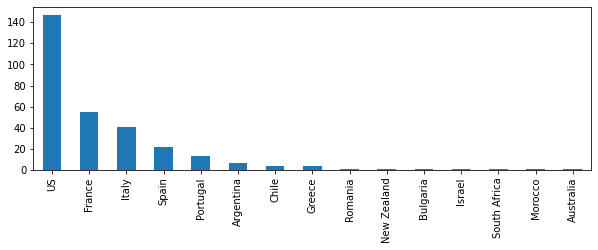

In [217]:
list_wines = wine["country"].iloc[:300].value_counts().sort_values(ascending=False)
list_wines.plot.bar(figsize = (10, 3))
plt.show()

## Selecting the max and min values with Index Max and Min
In addition to `.max()` and `.min()`, which returns the maximum or minimum values, we can use `.idxmax()` and `.idxmin()` to return the *index* pertaining to the maximum and minimum values. 

For example, let's use `.idxmax()` to find the country with the highest standard deviation in its prices.

In [218]:
wine.groupby(["country"])["price"].std().idxmax()

'France'

# Dealing with datetime in Pandas
Pandas built off the datetime package in Python to offer a datetime index, and plenty of ways to work with this.
However, it is still far from intuitive. 
That doesn't mean it's not useful, and for anyone doing a timeseries project, you'll need to deal with dates and times in pandas often.

Let's load a sample dataset of datetime energy data and get started!

In [219]:
energy = pd.read_csv('data/energy/PJM_Load_hourly.csv', parse_dates=True, index_col=0)
date_energy = energy.reset_index()

In [220]:
date_energy.loc[:, "Datetime"].dt.day

0        31
1        31
2        31
3        31
4        31
         ..
32891     1
32892     1
32893     1
32894     1
32895     2
Name: Datetime, Length: 32896, dtype: int64

Note that this data has a DateTimeIndex. 
setting `parse_dates=True` when we read the CSV lets pandas infer this datetimeindex.

We can select data points within a specific time range, using the DateTimeIndex and .loc.
Here, we select the first one day of data.

In [221]:
# One record for each hour of this day.


## Selecting with boolean indexing on pandas datetimeindex
We can use .dot notation with parts of the date to select on specific parts of the datetime, like days or months.

This is because pandas datetime indexes are datetime objects under the hood.

Let's look more closely at datetime objects in python.

Python datetime functionality example:

In [222]:
from datetime import datetime

We will start with a string of a date, and save this string in a variable called `s`.

Using a datetime function called `datetime.strptime()`, we can "extract" the date elements from this string.

We do this by giving formatting indicators as to where in the string the various datetime elements are located. The format indicator `%d` denotes an integer day, `%B` denotes a long-form month written in English, and `%Y` denotes a 4-digit year.

You can find more datetime format indicators in python [here](https://mkaz.blog/code/python-dates/) (under "Datetime Format Table").


Using the `.strptime()` function returns a **datetime object**, with the parts of the datetime contained in order from lowest time-granularity to highest (year --> seconds)

As mentioned before, we can access particular parts of this datetime object using dot notation (as they are stored as attributes of the object)

We can then use a second function from datetime, called `strftime()`, to convert this datetime object back to a string. Here, we have to specify the new string format we would like the new date string to have.

Now that we know about the various parts of a datetime object, we can use them to filter conditionally on the datetime object.

In [223]:
# making a new DF that only includes the month of septmeber from each year.


We can also call just a date, and get all the hours/time periods in that day:

Same with for a year and month:

In [224]:
# We see that it includes one record for each our of each day of the month of January, which has 31 days


In [225]:
# or better, with an assert statement:


# assert passes silently, meaning it is True


## Resampling
We can also combine the data in different ways, and over different time periods.
This means that just because our data is in hourly time periods, we dont have to keep it that way. 

In [226]:
# We can get the average load over a day:


In [227]:
# We can also get the total MWh used in a day:

# have to change unit from MW to MWh since summing changes measure from power to energy 
# more info on that here: https://energyeducation.ca/encyclopedia/Energy_vs_power


## Groupby with DateTimeIndex
Using groupby with a pandas DateTimeIndex can be extremely useful and powerful.
Let's look at how this can work.

The index level names are not particularly helpful here. We can change them.

In [228]:
# the long, ugly way


In [229]:
# resetting the df to get multi-index again


# the short, clean way. Both do the same thing.


## Selecting on Multi-Index: Using reset_index()
Selecting via a multi-index is difficult. It is much easier to work with these as "normal" pandas DataFrame columns.

To transform multi-indexes in to columns, we use `reset_index()`. Reset index pushes anything in the index into columns, and makes a new index with is simply an ascending count, starting at 0. 

Here, we can select all rows that were in week 50 in any year.

## Exercise:

- Find the day of the week that averages the highest consumption

- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?
    

- Is average consumption rising, falling, or staying the same over the years?
- What is the %age difference in consumption on average between April and June?

In [288]:
date_energy["hour"] = date_energy["Datetime"].dt.strftime('%H')
date_energy["year"] = pd.DatetimeIndex(date_energy["Datetime"]).year
date_energy['day_name'] = date_energy["Datetime"].dt.day_name()
date_energy['month'] = pd.DatetimeIndex(date_energy['Datetime']).month
date_energy['month'] = pd.to_datetime(date_energy['month'], format='%m').dt.month_name()
date_energy

,Datetime,PJM_Load_MW,hour,year,day_name,month
0,1998-12-31 01:00:00,29309.0,01,1998,Thursday,December
1,1998-12-31 02:00:00,28236.0,02,1998,Thursday,December
2,1998-12-31 03:00:00,27692.0,03,1998,Thursday,December
3,1998-12-31 04:00:00,27596.0,04,1998,Thursday,December
4,1998-12-31 05:00:00,27888.0,05,1998,Thursday,December
...,...,...,...,...,...,...
32891,2001-01-01 20:00:00,35209.0,20,2001,Monday,January
32892,2001-01-01 21:00:00,34791.0,21,2001,Monday,January
32893,2001-01-01 22:00:00,33669.0,22,2001,Monday,January
32894,2001-01-01 23:00:00,31809.0,23,2001,Monday,January


- Find the day of the week that averages the highest consumption

In [256]:
energy_day = date_energy.groupby("day_name").PJM_Load_MW.mean().idxmax()
energy_day

'Tuesday'

- Find the time of day that averages the lowest consumption.
    - Has this changed over the years?

In [257]:
energy_hour = date_energy.groupby("hour").PJM_Load_MW.mean().idxmin()
energy_hour

'04'

In [300]:
mean_date_values = date_energy\
    .groupby(["hour", "year"])["PJM_Load_MW"]\
    .mean()
mean_date_values = mean_date_values.reset_index()

mean_date_values\
    .set_index("hour")\
    .groupby("year")["PJM_Load_MW"]\
    .idxmin()

year
1998    04
1999    04
2000    04
2001    04
2002    00
Name: PJM_Load_MW, dtype: object

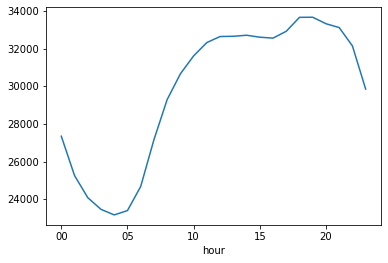

In [262]:
energy_year = date_energy.groupby("hour").PJM_Load_MW.mean().plot()


- Is average consumption rising, falling, or staying the same over the years?

<AxesSubplot:xlabel='year'>

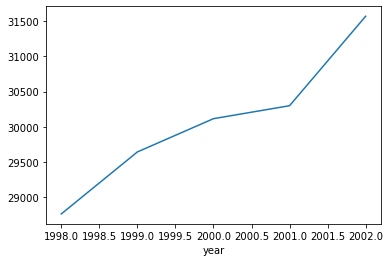

In [261]:
energy_year = date_energy.groupby("year").PJM_Load_MW.mean().plot()
energy_year

- What is the %age difference in consumption on average between April and June?

In [306]:
months_grouped = date_energy.groupby(["month"])["PJM_Load_MW"].mean()

months_grouped["June"] / months_grouped["April"] -1

0.21444749638155547